In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from soliton import ideal_soliton, robust_soliton
import lt

In [27]:
num_packets = 100
packet_sz = 20
res = []

In [20]:
e = lt.Encoder()
data = [''.join([str(random.randint(0, 1)) for _ in range(packet_sz)]) for _ in range(num_packets)]
e.create_blocks(data)
enc = e.encode(0, robust_soliton, M = 48, d = .5)

# xes = [next(enc) for _ in range(int(num_packets * 1.25))]

d = lt.Decoder()
while any(elem is None for elem in d.belief):
    d.update_belief(next(enc))
assert all(x is not None for x in d.belief), 'has not successfully reconstructed message'
# for x in xes:
#     d.update_belief(x)

out_data = ''.join(d.belief)
in_data = ''.join(data)
assert out_data == in_data, 'produced incorrect beliefs'
del e

res.append(d.num_packets)
del d

In [21]:
res

[2854]

In [ ]:
overall = []

for i in range(6):
    packets_required = []

    e = lt.Encoder()
    data = [''.join([str(random.randint(0, 1)) for _ in range(packet_sz)]) for _ in range(num_packets)]
    e.create_blocks(data)
    enc = e.encode(0, robust_soliton, M = 48, d = .5)

    for j in range(6):
        print(i*6 + j, end = ' ')
        d = lt.Decoder()
        while any(elem is None for elem in d.belief):
            d.update_belief(next(enc))
        assert all(x is not None for x in d.belief), 'has not successfully reconstructed message'

        out_data = ''.join(d.belief)
        in_data = ''.join(data)
        assert out_data == in_data, 'produced incorrect beliefs'
        packets_required.append(d.num_packets)

    overall.append(packets_required)

0 

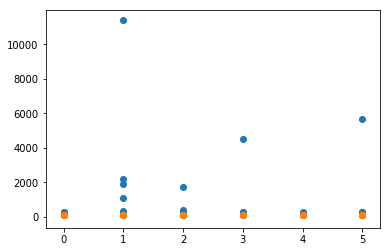

In [39]:
overall = np.array(overall)
x, y = [], []
for r in range(overall.shape[0]):
    for c in range(overall.shape[1]):
        x.append(r)
        y.append(overall[r,c])
plt.scatter(x,y)
plt.scatter(x,[100]*(overall.shape[0]*overall.shape[1]))
# plt.ylim([50,50000])
plt.show()

In [13]:
'''run this cell to validate degree distribution'''
from collections import Counter

degs = [x.degree for x in xes]
c = Counter(degs)
degss = [v for _,v in sorted(c.items())]

f, ax = plt.subplots(ncols = 2)
ax[0].plot(degss)
ax[1].plot(robust_soliton(1000, M = 485, d = 2))

NameError: name 'xes' is not defined

In [185]:
all(x > 0 for x in robust_soliton(5000, M = 485, d = 2))

True